**1. Loading and Understanding the Dataset**

We start by loading the dataset to understand the various attributes that contribute to predicting a healthy lifestyle. This dataset consists of 6,000 entries, each representing an individual’s physical fitness, diet, activity level, sleep habits, mindfulness, and career. The target variable, is_healthy, indicates whether a person is healthy (1) or not (0). By analyzing this data, we can uncover trends that define a healthy lifestyle.

In [3]:
import pandas as pd

# Load the dataset
file_path = "/content/innovize_final_ml (1).csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   phy_fitness         5997 non-null   float64
 1   diet_pref           5996 non-null   object 
 2   act_level           5994 non-null   object 
 3   sleep_hrs           6000 non-null   int64  
 4   mindfulness         6000 non-null   int64  
 5   career              5996 non-null   object 
 6   gender              5999 non-null   float64
 7   daily_avg_steps     5989 non-null   float64
 8   daily_avg_calories  5986 non-null   float64
 9   is_healthy          6000 non-null   int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 468.9+ KB


In [2]:
df.head()

,phy_fitness,diet_pref,act_level,sleep_hrs,mindfulness,career,gender,daily_avg_steps,daily_avg_calories,is_healthy
0,3.0,Vegan,Sedentary,7,10,Artist,1.0,2020.0,1831.0,0
1,4.0,Vegan,Lightly Active,7,1,Teacher,0.0,5154.0,2190.0,0
2,8.0,Vegetarian,Active,8,10,Freelancer,1.0,12363.0,2297.0,1
3,2.0,Pescatarian,Sedentary,8,7,Doctor,0.0,1664.0,1943.0,0
4,9.0,Pescatarian,Highly Active,5,7,Business,0.0,17680.0,3527.0,1


**2. Data Cleaning and Preprocessing**

Before training any model, it's crucial to clean the dataset. We remove duplicate entries to ensure that our results aren't skewed by redundant data. Missing values are handled appropriately so that our model learns from complete and accurate information. Additionally, categorical variables like diet and career are converted into numerical representations using encoding techniques, making them machine-learning friendly. Numerical features such as physical fitness and sleep hours are standardized to ensure fair comparisons across different scales.

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load dataset
df = pd.read_csv("/content/innovize_final_ml (1).csv")

# Drop duplicate rows (if any)
df.drop_duplicates(inplace=True)

# Identify numerical & categorical columns
num_cols = df.select_dtypes(include=["number"]).columns.tolist()
cat_cols = df.select_dtypes(exclude=["number"]).columns.tolist()

# Remove target variable from feature list
num_cols.remove("is_healthy")  # Assuming "is_healthy" is the target variable

# Pipelines for preprocessing
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),  # Fill missing values with median
    ("scaler", StandardScaler())  # Standardize numerical features
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Fill missing values with mode
    ("encoder", OneHotEncoder(handle_unknown="ignore"))  # One-hot encode categorical features
])

# Combine pipelines
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
])

# Apply transformations
X_processed = preprocessor.fit_transform(df.drop(columns=["is_healthy"]))
y = df["is_healthy"].values  # Extract target variable

# Convert processed features into DataFrame
processed_feature_names = (
    num_cols + list(preprocessor.named_transformers_["cat"].named_steps["encoder"].get_feature_names_out(cat_cols))
)
df_processed = pd.DataFrame(X_processed, columns=processed_feature_names)

df_processed["is_healthy"] = y  # Add target variable back

# Display preprocessed dataset
df_processed.head()

,phy_fitness,sleep_hrs,mindfulness,gender,daily_avg_steps,daily_avg_calories,diet_pref_Keto,diet_pref_Non-Vegetarian,diet_pref_Pescatarian,diet_pref_Vegan,...,career_Business,career_Doctor,career_Engineer,career_Freelancer,career_Lawyer,career_Manager,career_Nurse,career_Scientist,career_Teacher,is_healthy
0,-0.845114,-0.007309,1.539919,0.985768,-1.270506,-0.876283,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,-0.498803,-0.007309,-1.589056,-1.014438,-0.702740,-0.313718,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,0.886441,0.700052,1.539919,0.985768,0.603267,-0.146045,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
3,-1.191425,0.700052,0.496928,-1.014438,-1.335001,-0.700775,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1.232752,-1.422032,0.496928,-1.014438,1.566513,1.781406,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


**3. Choosing the Right Machine Learning Models**

Since our task is to classify individuals as healthy or unhealthy, we experiment with multiple machine-learning models to determine the best fit. We start with Support Vector Machines (SVM), a powerful algorithm that performs well in high-dimensional spaces. Then, we test Random Forest, which is an ensemble method that improves prediction by averaging multiple decision trees. Finally, we implement XGBoost, a gradient boosting technique known for its high accuracy and efficiency in structured data.

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/innovize_final_ml (1).csv")

# Drop duplicate rows (if any)
df.drop_duplicates(inplace=True)

# Identify numerical & categorical columns
num_cols = df.select_dtypes(include=["number"]).columns.tolist()
cat_cols = df.select_dtypes(exclude=["number"]).columns.tolist()

# Remove target variable from feature list
num_cols.remove("is_healthy")  # Assuming "is_healthy" is the target variable

# Pipelines for preprocessing
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),  # Fill missing values with median
    ("scaler", StandardScaler())  # Standardize numerical features
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Fill missing values with mode
    ("encoder", OneHotEncoder(handle_unknown="ignore"))  # One-hot encode categorical features
])

# Combine pipelines
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
])

# Apply transformations
X_processed = preprocessor.fit_transform(df.drop(columns=["is_healthy"]))
y = df["is_healthy"].values  # Extract target variable

# Convert processed features into DataFrame
processed_feature_names = (
    num_cols + list(preprocessor.named_transformers_["cat"].named_steps["encoder"].get_feature_names_out(cat_cols))
)
df_processed = pd.DataFrame(X_processed, columns=processed_feature_names)

df_processed["is_healthy"] = y  # Add target variable back

**4. Model Training and Performance Evaluation**

Each model is trained using an 80-20 split of the data, where 80% is used for training and 20% for testing. After training, we evaluate their performance using accuracy scores and visualizations. The decision boundary graphs allow us to see how well each model differentiates between healthy and unhealthy individuals. Higher accuracy indicates better generalization, but we also consider other factors like model interpretability and computational efficiency.

In [22]:
# Split dataset into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Train SVM model
svm_model = SVC(kernel="rbf", C=1.0, probability=True, random_state=42)
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Train XGBoost model
xgb_model = XGBClassifier(n_estimators=50, learning_rate=0.1, max_depth=6, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# Evaluate models
svm_acc = accuracy_score(y_test, svm_preds)
rf_acc = accuracy_score(y_test, rf_preds)
xgb_acc = accuracy_score(y_test, xgb_preds)

# Print classification reports
print("SVM Accuracy:", svm_acc)
print(classification_report(y_test, svm_preds))
print("Random Forest Accuracy:", rf_acc)
print(classification_report(y_test, rf_preds))
print("XGBoost Accuracy:", xgb_acc)
print(classification_report(y_test, xgb_preds))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:03:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


SVM Accuracy: 0.9825
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       803
           1       0.98      0.97      0.97       397

    accuracy                           0.98      1200
   macro avg       0.98      0.98      0.98      1200
weighted avg       0.98      0.98      0.98      1200

Random Forest Accuracy: 0.9708333333333333
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       803
           1       0.97      0.94      0.96       397

    accuracy                           0.97      1200
   macro avg       0.97      0.96      0.97      1200
weighted avg       0.97      0.97      0.97      1200

XGBoost Accuracy: 0.9841666666666666
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       803
           1       0.98      0.97      0.98       397

    accuracy                           0.98      1200
   macro avg       0.98    

**5. Decision Boundary Visualization**

We generate decision boundary plots for SVM, Random Forest, and XGBoost using two important features: physical fitness and mindfulness. These plots help us understand how each model makes decisions. A well-defined boundary means the model has learned clear distinctions between the two classes. Comparing the plots, we observe that XGBoost produces the sharpest boundary, indicating its superior classification power.

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:04:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


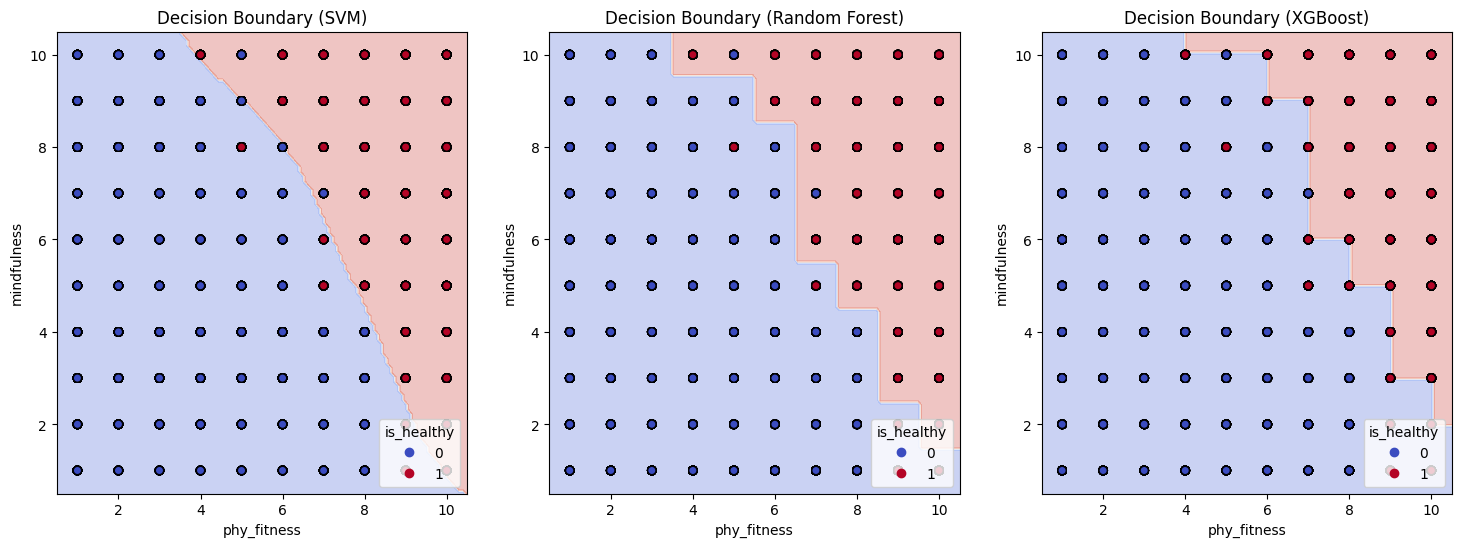

In [23]:
# Decision boundary visualization for all models
feature_x = "phy_fitness"
feature_y = "mindfulness"

# Select only two features for retraining all models
# Impute missing values before retraining
imputer = SimpleImputer(strategy='median')  # Create an imputer instance
X_train_subset = df[[feature_x, feature_y]]
X_train_subset = imputer.fit_transform(X_train_subset)  # Impute missing values
y_train_subset = df["is_healthy"]

# Retrain models on selected features
svm_model_subset = SVC(kernel="rbf", C=1.0, probability=True, random_state=42)
svm_model_subset.fit(X_train_subset, y_train_subset)

rf_model_subset = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_subset.fit(X_train_subset, y_train_subset)

xgb_model_subset = XGBClassifier(n_estimators=50, learning_rate=0.1, max_depth=6, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model_subset.fit(X_train_subset, y_train_subset)

# Create meshgrid for decision boundary
x_min, x_max = X_train_subset[:, 0].min() - 0.5, X_train_subset[:, 0].max() + 0.5  # Use column indices instead of column names
y_min, y_max = X_train_subset[:, 1].min() - 0.5, X_train_subset[:, 1].max() + 0.5  # Use column indices instead of column names
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Plot decision boundaries
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
models = [(svm_model_subset, "SVM"), (rf_model_subset, "Random Forest"), (xgb_model_subset, "XGBoost")]

for ax, (model, title) in zip(axes, models):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    scatter = ax.scatter(X_train_subset[:, 0], X_train_subset[:, 1], c=y_train_subset, cmap="coolwarm", edgecolors="k")  # Use column indices for scatter plot
    ax.set_xlabel(feature_x)
    ax.set_ylabel(feature_y)
    ax.set_title(f"Decision Boundary ({title})")
    ax.legend(*scatter.legend_elements(), title="is_healthy")

plt.show()

**6. Comparing Model Performance**

After evaluating the models, we compare their accuracy scores. While SVM performs well with non-linearly separable data, Random Forest brings robustness with multiple decision trees, and XGBoost outshines both with its optimized boosting strategy. Based on our observations, XGBoost emerges as the best-performing model, making it the ideal choice for this task.

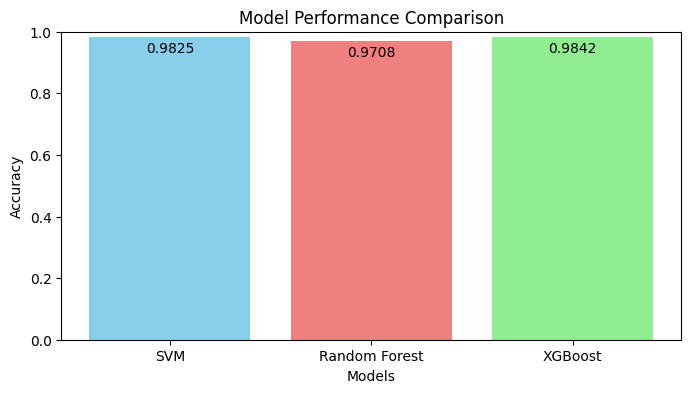

In [33]:
import matplotlib.pyplot as plt

# Accuracy scores (replace with your actual accuracy scores)
svm_acc = accuracy_score(y_test, svm_preds)
rf_acc = accuracy_score(y_test, rf_preds)
xgb_acc = accuracy_score(y_test, xgb_preds)

models = ['SVM', 'Random Forest', 'XGBoost']
accuracies = [svm_acc, rf_acc, xgb_acc]

# Bar plot of model accuracies
plt.figure(figsize=(8, 4))
plt.bar(models, accuracies, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
for i, v in enumerate(accuracies):
    plt.text(i, v - 0.05, f'{v:.4f}', ha='center')
plt.show()
